In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import myfunction as mf
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats.mstats import ttest_ind
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

from hotutils import areamean_utils as am 
from hotutils import season_utils as sc
from hotutils import mapplot_utils as mplt
from hotutils import corrplot_utils as cplt

import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Arial')

### Read files

In [2]:
# CMIP
nh_range,sh_range = slice(0,25),slice(-25,0)
#Precipitation
path_pr5 = '/home/donghq/dong_hq/cmip6/heatwave/cmip5/pr/MME/'
path_pr6 = '/home/donghq/dong_hq/cmip6/heatwave/hist_ssp/pr/monthly/MME/'
pr5   = xr.open_dataset(path_pr5+'pr_Amon_30MME_historical_rcp85_r1i1p1f1_19620101-20991231_regrid.nc').pr * 24 * 3600
pr6   = xr.open_dataset(path_pr6+'pr_Amon_27MME_historcial_ssp585_r1i1p1f1_196201-209912_regrid.nc').pr * 24 * 3600
pr_cmi    = xr.concat([pr6.sel(time=slice('1979','2022')),pr5.sel(time=slice('1979','2022'))],dim='model')
#TMAX
path_tx5 = '/home/donghq/dong_hq/cmip6/heatwave/cmip5/tasmax/MME/'
path_tx6 = '/home/donghq/dong_hq/cmip6/heatwave/hist_ssp/tasmax/MME/'
tx5   = xr.open_dataset(path_tx5+'tasmax_Amon_30MME_historical_rcp85_r1i1p1f1_195501-209912_regrid.nc').tasmax
tx6   = xr.open_dataset(path_tx6+'tasmax_Amon_27MME_historcial_ssp585_r1i1p1f1_197901-210012_regrid.nc').tasmax
tx_cmi    = xr.concat([tx6.sel(time=slice('1979','2022')),tx5.sel(time=slice('1979','2022'))],dim='model')

In [3]:
model5  = 'ACCESS1-0 ACCESS1-3 bcc-csm1-1-m bcc-csm1-1 BNU-ESM CanESM2 CCSM4 CESM1-BGC CMCC-CESM CMCC-CM CMCC-CMS CNRM-CM5 CSIRO-Mk3-6-0 FGOALS-g2 GFDL-CM3 GFDL-ESM2G GFDL-ESM2M HadGEM2-CC HadGEM2-ES inmcm4 IPSL-CM5A-LR IPSL-CM5A-MR IPSL-CM5B-LR MIROC-ESM-CHEM MIROC-ESM MIROC5 MPI-ESM-LR MPI-ESM-MR MRI-CGCM3 NorESM1-M'
model6  = 'ACCESS-CM2 ACCESS-ESM1-5 AWI-CM-1-1-MR BCC-CSM2-MR CanESM5 CMCC-ESM2 CNRM-CM6-1 CNRM-CM6-1-HR CNRM-ESM2-1 EC-Earth3 EC-Earth3-Veg FGOALS-g3 GFDL-CM4 GFDL-ESM4 GISS-E2-1-G HadGEM3-GC31-LL HadGEM3-GC31-MM INM-CM4-8 INM-CM5-0 IPSL-CM6A-LR MIROC6 MPI-ESM1-2-HR MPI-ESM1-2-LR MRI-ESM2-0 NESM3 NorESM2-LM NorESM2-MM'
models5 = model5.split()
models6 = model6.split()
models  = models6 + models5

In [4]:
# OBS
# TX
tx_obs = xr.open_dataset('/home/share-to-3/dhq-data/obs/tasmax/MME/tmax_month_1979-2022_3MME_regrid.nc').tmx
# Precipitation
pr_obs = xr.open_dataset('/home/share-to-3/dhq-data/obs/precip/MME/precip.mon.mean-1979-2022_5MME_regrid.nc').precip
pr_obs = pr_obs.where(pr_obs != -np.inf, np.nan)

### Spring trend in Southern Amazon and Southern Africa region

In [5]:
# Amazon
tcmi_ama_am = am.ram(mf.change_lon(tx_cmi,'lon').sel(lat=slice(-20,0),lon=slice(-80,-40)),'land')
pcmi_ama_am = am.ram(mf.change_lon(pr_cmi,'lon').sel(lat=slice(-20,0),lon=slice(-80,-40)),'land')
tobs_ama_am = am.ram(mf.change_lon(tx_obs,'lon').sel(lat=slice(-20,0),lon=slice(-80,-40)),'land')
pobs_ama_am = am.ram(mf.change_lon(pr_obs,'lon').sel(lat=slice(-20,0),lon=slice(-80,-40)),'land')
# Southern Africa
tcmi_sfa_am = am.ram(tx_cmi.sel(lat=slice(-25,-8),lon=slice(10,42)),'land')
pcmi_sfa_am = am.ram(pr_cmi.sel(lat=slice(-25,-8),lon=slice(10,42)),'land')
tobs_sfa_am = am.ram(tx_obs.sel(lat=slice(-25,-8),lon=slice(10,42)),'land')
pobs_sfa_am = am.ram(pr_obs.sel(lat=slice(-25,-8),lon=slice(10,42)),'land')

In [6]:
# PR
pcmi_sfa_rsp,_,_ = sc.relative_spring(pcmi_sfa_am,'S')
pcmi_ama_rsp,_,_ = sc.relative_spring(pcmi_ama_am,'S')
pobs_sfa_rsp,_,_ = sc.relative_spring(pobs_sfa_am,'S')
pobs_ama_rsp,_,_ = sc.relative_spring(pobs_ama_am,'S')
# TX
tcmi_sfa_rsp,_,_ = sc.relative_spring(tcmi_sfa_am,'S')
tcmi_ama_rsp,_,_ = sc.relative_spring(tcmi_ama_am,'S')
tobs_sfa_rsp,_,_ = sc.relative_spring(tobs_sfa_am,'S')
tobs_ama_rsp,_,_ = sc.relative_spring(tobs_ama_am,'S')

# PR
pcmi_sfa_td,_    = sc.mm_trend(pcmi_sfa_rsp,44)
pcmi_ama_td,_    = sc.mm_trend(pcmi_ama_rsp,44)
pobs_sfa_td,_    = sc.mm_trend(pobs_sfa_rsp,44)
pobs_ama_td,_    = sc.mm_trend(pobs_ama_rsp,44)
# TX
tcmi_sfa_td,_    = sc.mm_trend(tcmi_sfa_rsp,44)
tcmi_ama_td,_    = sc.mm_trend(tcmi_ama_rsp,44)
tobs_sfa_td,_    = sc.mm_trend(tobs_sfa_rsp,44)
tobs_ama_td,_    = sc.mm_trend(tobs_ama_rsp,44)

In [7]:
# calculate correlation
corr_sfa = stats.pearsonr(pcmi_sfa_td, tcmi_sfa_td)
corr_ama = stats.pearsonr(pcmi_ama_td, tcmi_ama_td)

### Plot

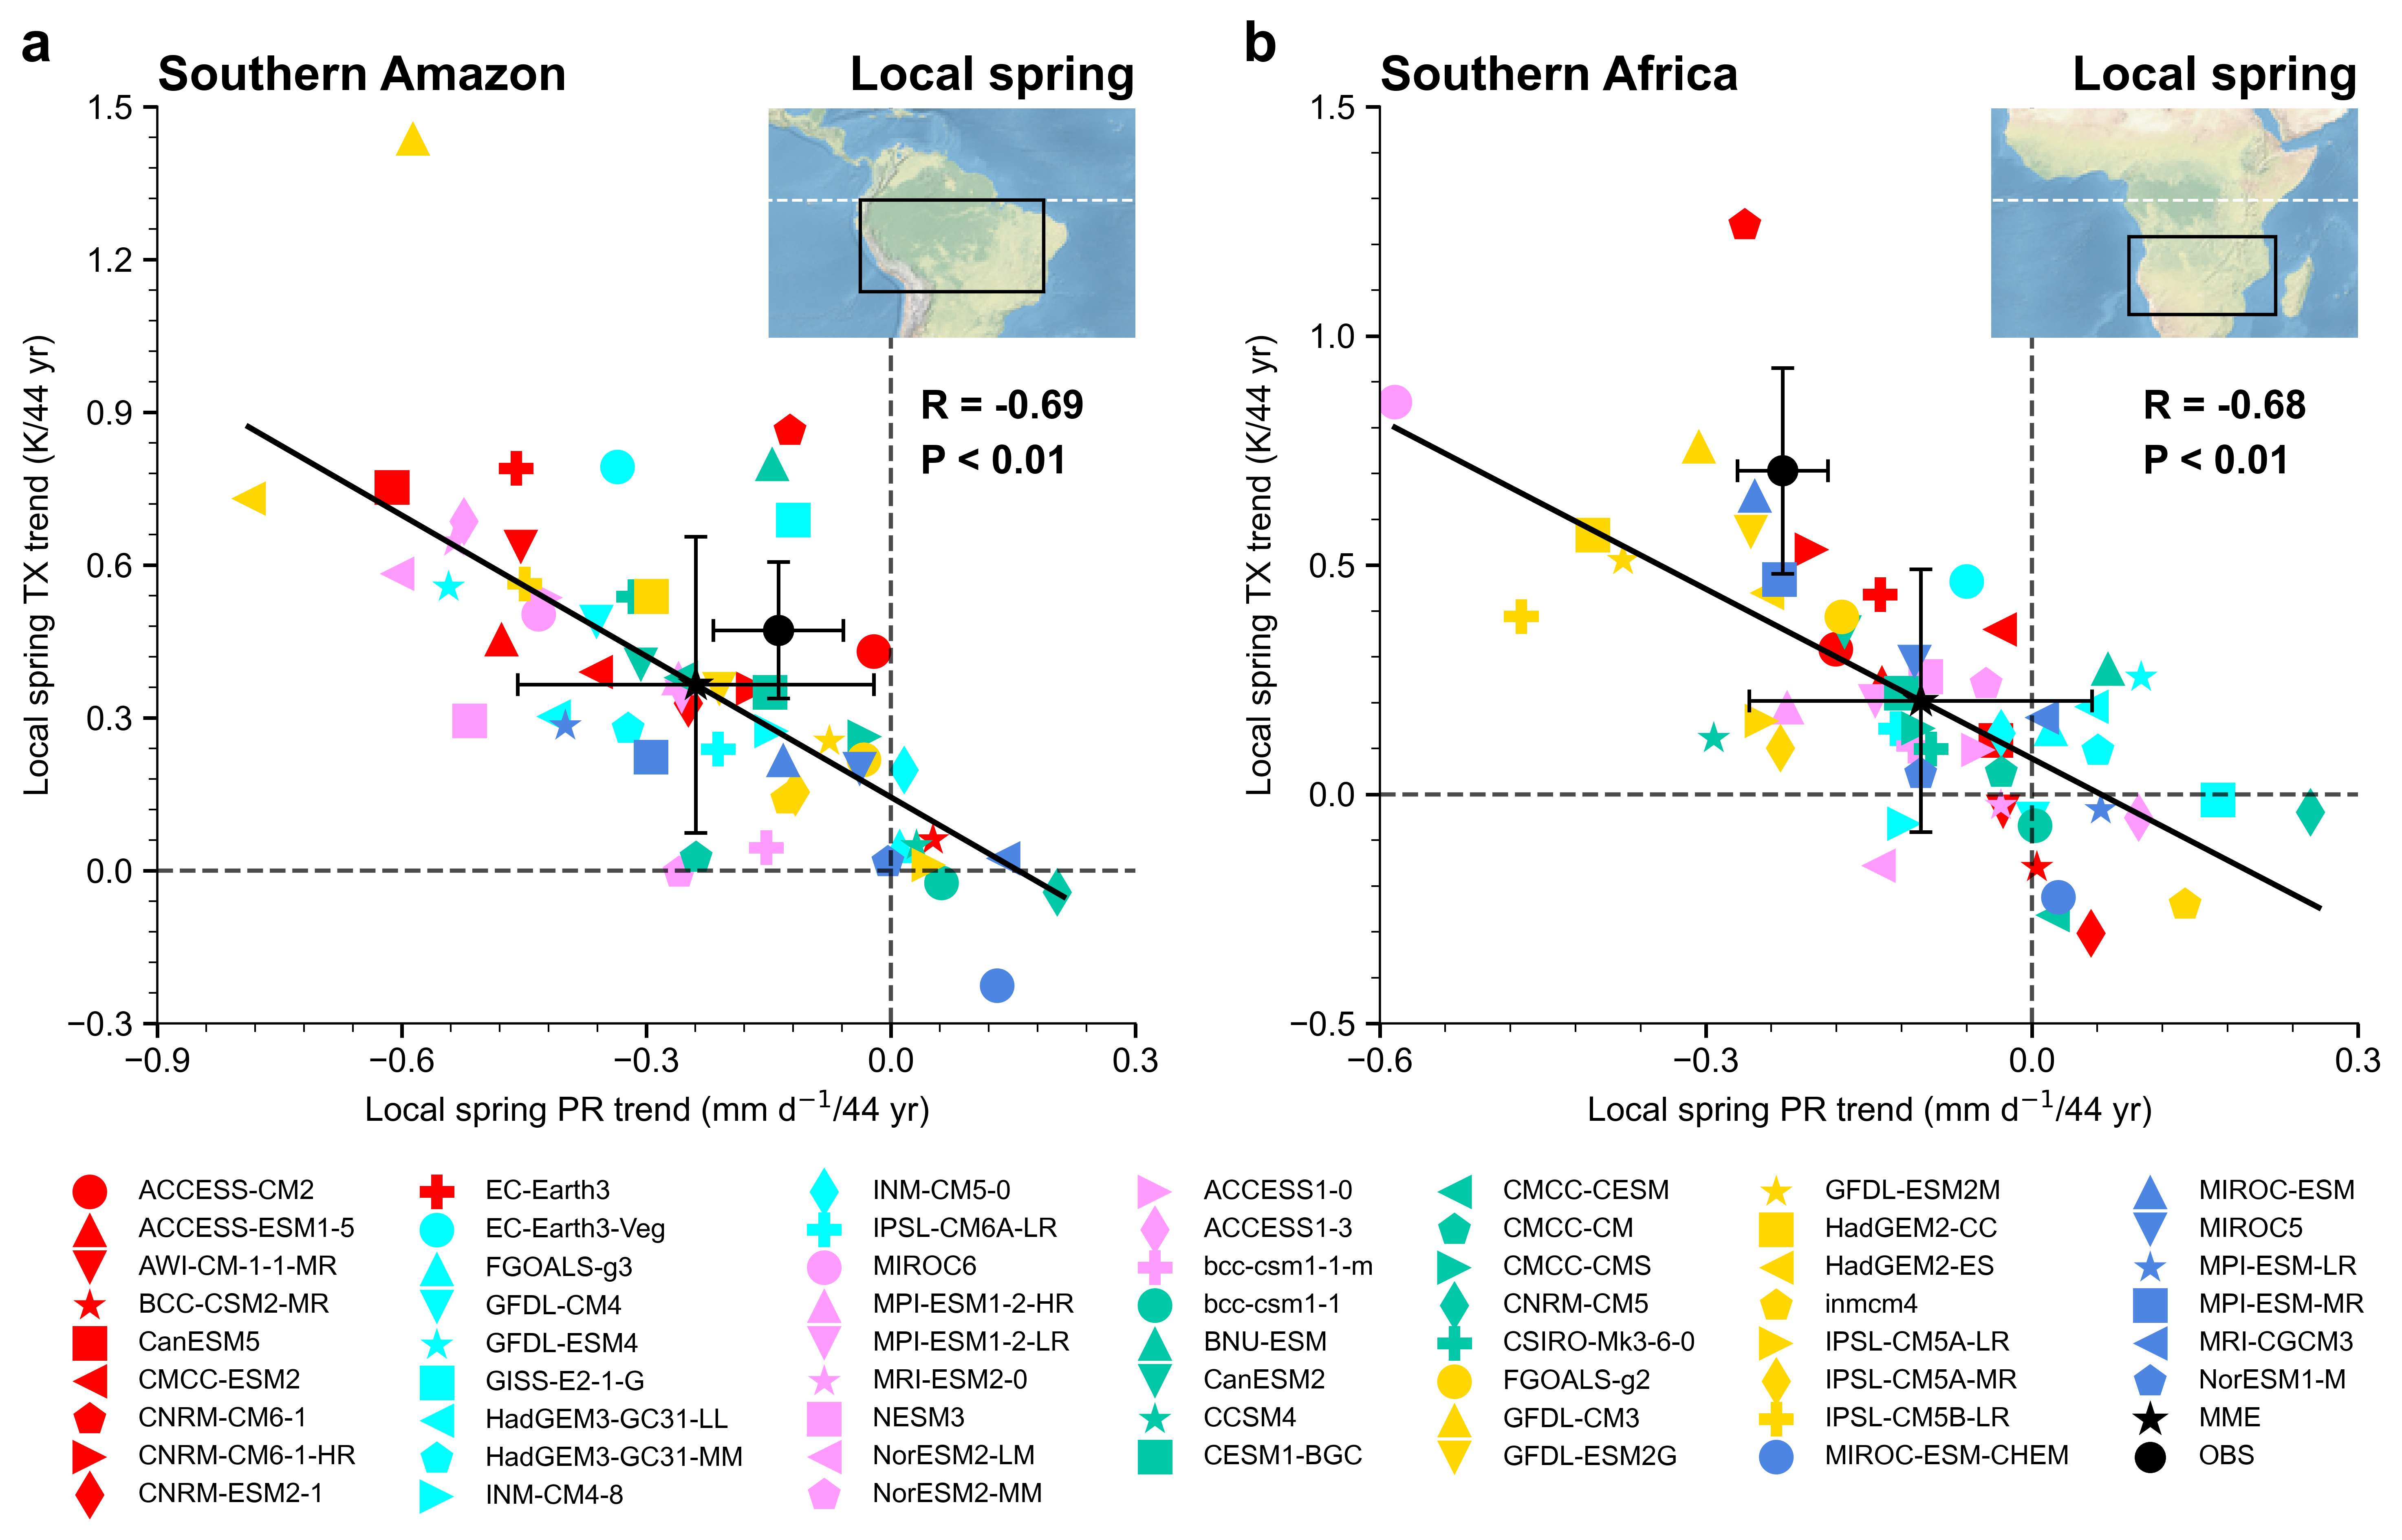

In [8]:
ft = 12
fig = plt.figure(figsize=(12, 6), dpi=500)
# plt.rcParams['font.sans-serif'] = 'Arial'  # 设置字体
plt.rcParams['hatch.color'] = 'white'
plt.rcParams['hatch.linewidth'] = 0.4

ax1 = cplt.ax1_corr(fig,pcmi_ama_td,tcmi_ama_td,pobs_ama_td,tobs_ama_td,[-0.9,0.3],[-0.3,1.5],0.3,0.3,0.78,0.6,[0.14,0.05],corr_ama,models,
             ['Local spring PR trend (mm d$^{-1}$/44 yr)','Local spring TX trend (K/44 yr)'],'a','Southern Amazon','','Local spring',False,ft,0.05,0.45,0.20,0.95,sft=150)

ax2 = cplt.ax1_corr(fig,pcmi_sfa_td,tcmi_sfa_td,pobs_sfa_td,tobs_sfa_td,[-0.6,0.3],[-0.5,1.5],0.3,0.5,0.78,0.6,[0.14,0.05],corr_sfa,models,
             ['Local spring PR trend (mm d$^{-1}$/44 yr)','Local spring TX trend (K/44 yr)'],'b','Southern Africa','','Local spring',False,ft,0.55,0.95,0.20,0.95,sft=150)

mplt.location_map(fig,[-100,-20,-30,20],[-80,-40,-20,0],0.30,0.45,0.75,0.96)
mplt.location_map(fig,[-20,60,-30,20],[10,42,-25,-8],0.80,0.95,0.75,0.96)

ax1.legend(loc='center',bbox_to_anchor=(1.08, -0.35),ncol = 7,fontsize=ft-2.5,frameon=False)